In [1]:
# Importing all Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


In [2]:
# Read the dataset
dataset = pd.read_csv("CR_Data_Cleaned_V3.csv")

# EDA

In [3]:
# Calculate the number of missing values per column
missing_values_count = dataset.isnull().sum()

# Calculate the percent of missing values per column
percent_missing = (missing_values_count / len(dataset)) * 100

# Create a DataFrame to hold the missing value counts and percentages
missing_df = pd.DataFrame({'Missing Values': missing_values_count, 'Percent of Missing': percent_missing})

# Sort the DataFrame based on the number of missing values in descending order
missing_df_sorted = missing_df.sort_values(by='Missing Values', ascending=False)

missing_df_sorted

,Missing Values,Percent of Missing
Post_Peak_Heart_Rate_range,91,49.456522
Post_Peak_Heart_Rate,91,49.456522
Unexpected_Events,84,45.652174
Anxiety_Scores,73,39.673913
Depression_Scores,73,39.673913
...,...,...
Admission_Diagnosis_STEMI,0,0.000000
Admission_Diagnosis_PCI,0,0.000000
Admission_Diagnosis_Other cardiothoracic procedures,0,0.000000
Admission_Diagnosis_NSTEMI,0,0.000000


In [16]:
# To fine the numbers of duplicaate records
number_duplicate_record = 0;
bool_series = dataset.duplicated()
for b in bool_series:
    if(b):
        print(bool_series.index(b))
        number_duplicate_record = number_duplicate_record+1
print("Number of duplicate record: ",number_duplicate_record)

Number of duplicate record:  0


# Data Preprocessing


In [4]:
def map_intensity(value):
    if pd.isnull(value):
        return np.nan 
    elif value in [1, 2]:
        return 'Low Intensity'
    elif value in [3, 4]:
        return 'Moderate Intensity'
    elif value in [5, 6]:
        return 'Moderately High Intensity'
    elif value in [7, 8]:
        return 'High Intensity'

dataset['Exercise_intensityNew'] = dataset['Exercise_intensity'].apply(map_intensity)


In [5]:
dataset['Race'].replace(['Others', 'Chinese', 'Malay', 'Indian', 'Unknown'],[0, 1, 2,3,4], inplace=True)
dataset['Education_level'].replace(['Form 6 / pre-university graduate', 'Unknown', 'College/university graduate', 'Some secondary education', 'Form 5 graduate', 'Std 6 or less', 'Post-graduate', 'Technical graduate'],[0, 1, 2,3,4,5,6,7], inplace=True)
dataset['Patient_occupation'].replace(['Government servant', 'Self-employed (excludes housewives)', 'Private employment'],[0, 1, 2], inplace=True)
dataset['Health_funding'].replace(['Fully Funded', 'Self funded', 'Semi-Funded'], [0, 1, 2], inplace=True)
dataset['CR_Intake'].replace(['Yes', 'No'], [0, 1], inplace=True)
dataset['Prescribed_Sessions'].replace(['8 weeks', '> 8 weeks', 'Did Not Enroll CR', '6 weeks'], [0, 1, 2, 3], inplace=True)
dataset['AACVPR_Risk_Category'].replace(['Low', 'Intermediate', 'High', 'Did Not Enroll CR', 'Unknown'], [0, 1, 2, 3, 4], inplace=True)
dataset['CR_Adherence'].replace(['Yes', 'Did Not Enroll CR', 'No'], [0, 1, 2], inplace=True)
dataset['Pre_Tobacco'].replace(['Never smoked', 'Former smoker', 'Current smoker'], [0, 1, 2], inplace=True)
dataset['Post_Tobacco'].replace(['nan', 'Abstaining', 'Unknown', 'Not Abstaining'], [3, 0, 1, 2], inplace=True)
dataset['Pre_Exercise_Stress_Test'].replace(['Treadmill', '6MWT only', 'Arm Ergo'], [0, 1, 2], inplace=True)
dataset['Post_Exercise_Stress_Test'].replace(['Treadmill', '6MWT only', 'Arm Ergo', 'nan'], [0, 1, 2, 3], inplace=True)
dataset['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
dataset['Pre_Left_Ventricle_EF'].replace(['nan', 'more then 50% with no failure symptoms', 'less then 40%', 'between 40 to 50%'], [3, 0, 1, 2], inplace=True)
dataset['Triglyceride_cat'].replace(['Normal', 'High', 'Borderline high', 'Very High', 'nan'], [0, 1, 2, 3, 4], inplace=True)
dataset['HDL_cat'].replace(['Intermediate risk', 'High Risk', 'Low risk', 'nan'], [0, 1, 2, 3], inplace=True)
dataset['LDL_cat'].replace(['Intermediate risk', 'Low Risk', 'High risk', 'nan'], [0, 1, 2, 3], inplace=True)
dataset['HbA1c_cat'].replace(['Normal', 'Prediabetes', 'Diabetes', 'nan'], [0, 1, 2, 3], inplace=True)
dataset['Pre_BP_cat'].replace(['Optimal', 'Isolated Systolic Hypertension', 'At Risk', 'Normal', 'Hypertension Stage 1', 'Hypertension Stage 2', 'nan', 'Hypertension Stage 3'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
dataset['CR_BP_cat'].replace(['Optimal', 'Normal', 'Isolated Systolic Hypertension', 'At Risk', 'nan', 'Hypertension Stage 1'], [0, 1, 2, 3, 4, 5], inplace=True)
dataset['CR_Completion'].replace(['Yes', 'Did not enroll to CR', 'No'], [0, 1, 2], inplace=True)
dataset['Pre_BMI_range'].replace(['Normal', 'Obesity', 'Overweight', 'nan', 'Underweight'], [0, 1, 2, 3, 4], inplace=True)
dataset['Post_BMI_range'].replace(['Normal', 'Obesity', 'Overweight', 'nan', 'Underweight'], [0, 1, 2, 3, 4], inplace=True)
dataset['Pre_Peak_Heart_Rate_range'].replace(['Moderate', 'nan', 'Hard', 'Light', 'Very Light', 'Very Hard'], [0, 1, 2, 3, 4, 5], inplace=True)
dataset['Post_Peak_Heart_Rate_range'].replace(['nan', 'Very Light', 'Very Hard', 'Hard', 'Moderate', 'Light'], [1, 4, 5, 2, 0, 3], inplace=True)
dataset['Pre_METs_range'].replace(['Vigorous Intensity', 'Moderate Intensity', 'Light Intensity', 'nan'], [0, 1, 2, 3], inplace=True)
dataset['Post_Peak_METs_range'].replace(['nan', 'Vigorous Intensity', 'Moderate Intensity', 'Light Intensity'], [3, 0, 1, 2], inplace=True)
dataset['place_name'].replace(
    ['nan', 'Klang', 'Sungai Buloh', 'Kuala Lumpur, Pandan', 'Kuala Lumpur', 'Petaling Jaya', 'Subang Jaya',
     'Kuala Lumpur, Gombak', 'Dong', 'Puchong, Sungai Buloh', 'Seremban', 'Kuala Selangor', 'Kuala Terengganu',
     'Ampang', 'Shah Alam', 'Chini', 'Subang Jaya, Petaling Jaya', 'Seri Kembangan', 'Telok Panglima Garang',
     'Batu Caves, Batu Caves', 'Kuala Lumpur, Cheras', 'Pelabuhan Klang', 'Miri', 'Hulu Langat', 'Nilai',
     'Kuala Lumpur, Setapak', 'Semenyih', 'Ipoh', 'Melaka', 'Puchong', 'Rawang', 'Rawang, Batu Arang', 'Kajang'],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
    inplace=True

)

dataset['state_name'].replace(
    [np.nan, 'Selangor', 'Kuala Lumpur', 'Pahang', 'Negeri Sembilan', 'Terengganu', 'Sarawak', 'Perak', 'Melaka'],
    [0, 1, 2, 3, 4, 5, 6, 7, 8],
    inplace=True
)
dataset['Exercise_intensityNew'].replace({
    np.nan: np.nan,  
    'Low Intensity': 1,
    'Moderate Intensity': 2,
    'Moderately High Intensity': 3,
    'High Intensity': 4
}, inplace=True)


dataset

,Patient_Registration_Number,Race,Education_level,Patient_occupation,Health_funding,CR_Intake,Prescribed_Sessions,AACVPR_Risk_Category,CR_Adherence,Triglyceride,...,Duration_CR,Pre_BMI,Post_BMI,Pre_BMI_range,Post_BMI_range,Pre_Peak_Heart_Rate_range,Post_Peak_Heart_Rate_range,Pre_METs_range,Post_Peak_METs_range,Exercise_intensityNew
0,8444773,0,0,0,0,0,0,0,0,1.0,...,126.0,19.027399,19.788495,0.0,0.0,0.0,NaN,0.0,NaN,3.0
1,15302617,1,1,1,1,0,0,1,0,2.3,...,123.0,35.751278,35.049617,1.0,1.0,NaN,NaN,0.0,0.0,NaN
2,6862705,0,2,1,1,0,0,1,0,1.2,...,92.0,23.610200,23.224413,2.0,2.0,NaN,NaN,1.0,NaN,4.0
3,2282933,2,3,0,0,0,0,1,0,1.2,...,69.0,18.552876,19.817844,0.0,0.0,NaN,NaN,0.0,0.0,2.0
4,3531899,2,1,0,0,0,0,0,0,1.2,...,126.0,27.636054,27.352608,1.0,2.0,2.0,NaN,0.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,3439119,3,4,0,0,0,0,2,0,1.0,...,175.0,25.744288,28.228386,2.0,1.0,4.0,4.0,1.0,1.0,1.0
180,33187470,1,1,2,0,0,0,1,0,0.8,...,67.0,22.545068,23.266510,0.0,2.0,0.0,NaN,0.0,0.0,NaN
181,33532322,2,1,1,1,0,0,2,0,1.0,...,92.0,20.552502,22.058051,0.0,0.0,0.0,0.0,0.0,0.0,3.0
182,22674373,2,2,2,0,0,0,0,0,0.6,...,57.0,24.687120,24.437440,2.0,2.0,2.0,NaN,0.0,0.0,2.0


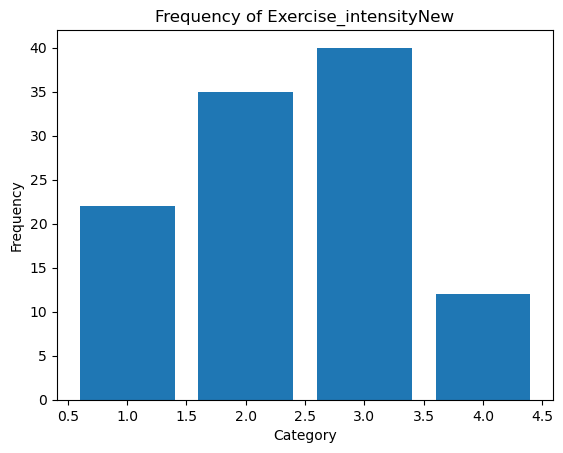

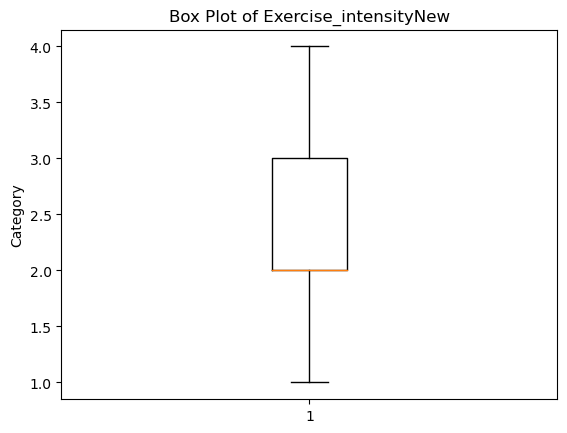

In [6]:
import matplotlib.pyplot as plt

# Assuming 'Exercise_intensityNew' is your column of interest
column = 'Exercise_intensityNew'

# Frequency count
frequency_counts = dataset[column].value_counts(dropna=False)

# Bar plot
plt.bar(frequency_counts.index, frequency_counts.values)
plt.title(f"Frequency of {column}")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

# Box plot for an ordinal variable
if dataset[column].dtype in ['int64', 'float64'] and len(dataset[column].unique()) > 2:
    plt.boxplot(dataset[column].dropna())
    plt.title(f"Box Plot of {column}")
    plt.ylabel('Category')
    plt.show()



In [7]:
#Given this distribution, the mode appears to be the most common value and thus a strong candidate for filling in the 
#missing values. The median would not be significantly different in this case because the categories are not evenly 
#distributed; the median would likely be the same as the mode given the skew towards 'c2'

In [8]:
from sklearn.impute import SimpleImputer

# Calculate the mean of the numeric columns, ignoring non-numeric ones
numeric_means = dataset.select_dtypes(include=[np.number]).mean()

# Perform mean imputation for all numeric columns except 'Exercise_intensityNew'
columns_to_impute = dataset.columns.difference(['Exercise_intensityNew'])
dataset[columns_to_impute] = dataset[columns_to_impute].fillna(numeric_means)

# Calculate the mode for the 'Exercise_intensityNew' column
mode_imputer = SimpleImputer(strategy='most_frequent')
dataset['Exercise_intensityNew'] = mode_imputer.fit_transform(dataset[['Exercise_intensityNew']])

dataset


,Patient_Registration_Number,Race,Education_level,Patient_occupation,Health_funding,CR_Intake,Prescribed_Sessions,AACVPR_Risk_Category,CR_Adherence,Triglyceride,...,Duration_CR,Pre_BMI,Post_BMI,Pre_BMI_range,Post_BMI_range,Pre_Peak_Heart_Rate_range,Post_Peak_Heart_Rate_range,Pre_METs_range,Post_Peak_METs_range,Exercise_intensityNew
0,8444773,0,0,0,0,0,0,0,0,1.0,...,126.0,19.027399,19.788495,0.0,0.0,0.000000,2.010753,0.0,0.190083,3.0
1,15302617,1,1,1,1,0,0,1,0,2.3,...,123.0,35.751278,35.049617,1.0,1.0,2.236111,2.010753,0.0,0.000000,3.0
2,6862705,0,2,1,1,0,0,1,0,1.2,...,92.0,23.610200,23.224413,2.0,2.0,2.236111,2.010753,1.0,0.190083,4.0
3,2282933,2,3,0,0,0,0,1,0,1.2,...,69.0,18.552876,19.817844,0.0,0.0,2.236111,2.010753,0.0,0.000000,2.0
4,3531899,2,1,0,0,0,0,0,0,1.2,...,126.0,27.636054,27.352608,1.0,2.0,2.000000,2.010753,0.0,0.190083,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,3439119,3,4,0,0,0,0,2,0,1.0,...,175.0,25.744288,28.228386,2.0,1.0,4.000000,4.000000,1.0,1.000000,1.0
180,33187470,1,1,2,0,0,0,1,0,0.8,...,67.0,22.545068,23.266510,0.0,2.0,0.000000,2.010753,0.0,0.000000,3.0
181,33532322,2,1,1,1,0,0,2,0,1.0,...,92.0,20.552502,22.058051,0.0,0.0,0.000000,0.000000,0.0,0.000000,3.0
182,22674373,2,2,2,0,0,0,0,0,0.6,...,57.0,24.687120,24.437440,2.0,2.0,2.000000,2.010753,0.0,0.000000,2.0


In [9]:
from imblearn.over_sampling import SMOTE

# Convert 'Exercise_intensityNew' to integer type
dataset['Exercise_intensityNew'] = dataset['Exercise_intensityNew'].astype(int)


X = dataset.drop(['Exercise_intensity', 'Exercise_intensityNew'], axis=1)
y = dataset['Exercise_intensityNew'] - 1

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)




In [10]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_normalized = scaler.fit_transform(X_resampled)


X_resampled = pd.DataFrame(X_normalized, columns=X.columns)





In [11]:
from sklearn.model_selection import train_test_split


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Model Building XGBoost

In [12]:
# XGBoost
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", num_class=5, random_state=42)


xgb_classifier.fit(X_train, y_train)


y_pred1 = xgb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.76      0.76      0.76        21
           2       0.77      0.81      0.79        21
           3       0.93      1.00      0.96        26

    accuracy                           0.85        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.85      0.85      0.85        92



# Model Building Support Vector

In [13]:
#SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0)


svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8152173913043478
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.75      0.86      0.80        21
           2       0.69      0.43      0.53        21
           3       0.90      1.00      0.95        26

    accuracy                           0.82        92
   macro avg       0.80      0.80      0.79        92
weighted avg       0.80      0.82      0.80        92



In [14]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0)


svm_classifier.fit(X_train, y_train)

# Grid Search based SVM
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}


svm_classifier = SVC()


grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train, y_train)

Best Parameters: {'C': 10, 'kernel': 'rbf'}


SVC(C=10)

In [15]:

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9130434782608695
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       1.00      0.86      0.92        21
           2       0.76      0.90      0.83        21
           3       0.96      1.00      0.98        26

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92

